In [1]:
### BEGIN hide_toggle
### Update 30/10-'20
def hide_toggle_code(off=0):
    """This function generates HTML code to toggle the display of an input
    cell.
    
    The output of the cell will still be displayed.  This can be used
    to hide (from immediate view) some code to generate data or the
    like.  It can also be used to hide other notebook explicit
    implementations - e.g., C++ processing, or the like.
    
    Note, calling this function alone will not enable toggling.
    Instead, we must wrap the generated code in an
    `IPython.display.HTML` object and return that as the cell value.
    This will let IPython evaluate the HTML code and pass it on to the
    browser.
    
    If all one wants is to toggle a cell one can use the function
    `hide_toggle` below.  However, we can also combine the code
    generated here with other HTML code - for example _style_
    declarations and pass that along embedded in an HTML object.
    
    Parameters
    ----------
    off : int 
        Offset of cell to hide relative to the cell calling this function 
    
    Returns
    -------
    code : str 
        HTML code to enable toggling of the cell

    """
    from random import randint 
    from IPython.display import HTML 
    
    jp_cell     = 'document.getElementsByClassName("jp-Cell jp-mod-selected")[0]'
    jq_cell     = '$("div.cell.code_cell.rendered.selected")'
    toggle_text = 'Please close'
    cell_id     = str(randint(1,2**64))
    func_name   = f'code_toggle_{cell_id}'
    
    scr1 = f'''
    <script id="s{cell_id}">
      function {func_name}() {{
          if (typeof $ == "undefined") {{
              // console.log("For JupyterLab (no jQuery)")
              var c  = {jp_cell};
              // console.log(c);
              var iw = c.getElementsByClassName("jp-Cell-inputArea")[0];
              var op = c.getElementsByClassName("jp-OutputPrompt")[0];
              // console.log(iw,op)
              if (iw.style.display !== undefined && iw.style.display === "none") {{
                  iw.style.display = null;
                  op.style.display = null;
              }} else {{
                  iw.style.display = "none";
                  op.style.display = "none";
              }}
           }}
           else {{
                console.log('Will toggle input display {jp_cell}')
                console.log({jp_cell})
                {jq_cell}.find("div.input").toggle();
                {jq_cell}.find("div.out_prompt_overlay.prompt").toggle();
                {jq_cell}.find("div.out_prompt_overlay.prompt").toggle();
                {jq_cell}.find("div.prompt.output_prompt").toggle();
                console.log('End toggle input display {jp_cell}')
           }}
      }}  
    </script>
    '''
    but = f'''
     <details style='z-index:99;position:relative;color:lightgray;' 
             onclick='javascript:{func_name}()'>
        <summary>&gt;</summary>
    </details>
    '''
    scr2 = f'''
    <script>
      var c = null;
      if (typeof $ == "undefined") {{
         var c  = document.getElementById("s{cell_id}");
         var p  = c.parentNode.parentNode.parentNode.parentNode.parentNode;
         var iw = p.getElementsByClassName("jp-Cell-inputArea")[0];
         var op = p.getElementsByClassName("jp-OutputPrompt")[0];
         var ou = c.parentNode;
         iw.style.display = "none";
         op.style.display = "none";
         ou.style.background = "transparent";
      }}
      else {{
          var p = $('#s{cell_id}').parents();
          p.siblings('div.input').hide();
          p.find('div.prompt.output_prompt').hide()
          p.find('div.out_prompt_overlay.prompt').hide()      
      }}
      // {func_name}
    </script>
    '''
    return scr1+but+scr2        

def hide_toggle(off=0,cnt=None):
    """This will wrap the HTML code returned from the above function
    in an `IPython.display.HTML` object so that the notebook will 
    evaluate the HTML code. 
    
    This function is what we will use most of the time.  However, 
    the function `hide_toggle_code` can be combined with other code 
    and then be put  into an HTML object to let the notebook evaluate
    all the code. 

    Parameters 
    ----------
    off : int 
        Cell offset relative to calling cell which we should toggle 
    cnt : int or None 
        If not None, set the execution count to this number 
        (currently broken)
        
    Returns
    -------
    object : IPython.display.HTML 
        HTML object wrapping code to toggle cell 
    """
    from IPython.display import HTML
    if cnt is not None:
        get_ipython().execution_count = cnt
    return HTML(hide_toggle_code(off))
### END hide_toggle
# hide_toggle(cnt=0)


### BEGIN setup_matplotlib
### Update 30/10-'20
def _setup_matplotlib():
    """Set-up Matplotlib parameters. 
    
    We specify that we want both PDF and PNG images, and 
    that the default image size should be 8 by 8 inches 
    
    We also disable warnings about too many open figures 
    """
    %matplotlib inline 
    from matplotlib import rcParams 
    
    rcParams['figure.max_open_warning'] = 0
    rcParams['font.serif'] = ['Palatino'] + rcParams['font.serif']
    rcParams['font.family'] = ['serif']
    rcParams['mathtext.fontset'] = 'dejavuserif'
    rcParams['axes.formatter.use_mathtext'] = True

    f = None
    try:
        # IPython >= 7.23 depcrates set_matplotlib_formats
        from matplotlib_inline.backend_inline import set_matplotlib_formats
        f = set_matplotlib_formats
        
    except Exception as e:
        try:
            from IPython.display import set_matplotlib_formats
            f = set_matplotlib_formats
        except Exception as e:
            pass 

    if f is not None:
        set_matplotlib_formats('png','pdf')
        
_setup_matplotlib()
### END setup_matplotlib
_setup_matplotlib()

### BEGIN css_styling
### Update 30/10-'20
def css_styling_code():
    """This function returns HTML code to customize the CSS 
    of the notebook 
    
    - The text font to be Palatino (serif)
    - Headers are oblique (italic)
    - Extra spacing below H1 headers 
    - Extra spacing spacing above H1 headers 
    - Headers have larger fonts, and is set in normal weight
    - Remove padding around code cells 
    - Code uses the fint "Source Code Pro" (or monospace)
    - Code background is changed to light yellow 
    - Output background is set to lavender
    
    The function combines these CSS declarations with the HTML 
    code from `hide_toggle_code` above so what we automatically 
    hide this code from the user. 
    """
    styles = '''
    <style>
    .rendered_html, .jp-RenderedHTMLCommon {
        font-family: Palatino, serif
    }
    h1, h2, h3, h4, .jp-RenderedHTMLCommon h1, .jp-RenderedHTMLCommon h2, .jp-RenderedHTMLCommon h3, .jp-RenderedHTMLCommon h4{
        font-style: oblique;  
    }
    jp-RenderedHTMLCommon h1:first-child {
        margin-top: 4ex;
    }
    .jp-RenderedHTMLCommon h1, .rendered_html h1 {
        margin-bottom: 2ex;
        font-weight: normal;
        font-size: 220%;
    }
    .jp-RenderedHTMLCommon h2, .rendered_html h2 {
        font-weight: normal;
        font-size: 180%;
    }
    .jp-RenderedHTMLCommon h3, .rendered_html h3 {
        font-weight: normal
    }
    .jp-RenderedHTMLCommon h4, .rendered_html h4 {
        font-weight: normal
    }
    p code {
        padding: 0;
    }
    .CodeMirror, .jp-Notebook .CodeMirror.cm-s-jupyter, code, div.input_area {
        font-family: "Source Code Pro", source-code-pro,Consolas, monospace;
        background: lightyellow;
    }
    .output_text, .output_stream, .output_stdout, .jp-OutputArea-executeResult .jp-OutputArea-output {
        background: lavender;
    }
    .output_error {
        background-color: #fff2f2;
    }
    .celltag_alert-info li {
        list-style-image:  url(data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAABAAAAAQCAYAAAAf8/9hAAAAAXNSR0IArs4c6QAAAAZiS0dEAP8A/wD/oL2nkwAAAAlwSFlzAAALEwAACxMBAJqcGAAAAAd0SU1FB9gEGxE4IQYzJ14AAAI3SURBVDjLZZNPSFVBFIe/e9+zd3silBCl0SZoU4s2rVq0EB5tQip4UNvATVGu3QRBiyAi2iltWkgbF5EgRhFFRpiWtrWIzDIV1Pzz7p15M2fmtvDevOqBw8DM9zvnN8ycgF3R/eDtM2mac96ZdrFNxBikqbRV+vHH/ut9gAZczoe7C3gnF0f6au1OLM5avFi8d1Ea+JvAMSAq8nsKOGs5f2cYJ3Y7rc2PO4BqkS8DdD98f9tbe1ysCoxOBo1qlEXHJWcM4b5KPU19zleA0o4Clx99eO3EdqVewHsCoFRugUoVghJO7A6H6Vx9wdtYi27cr5x6dy/03nVtWTU7bWeZh6jNUcAiCaFTURl9A+gs56AviHzh3mnqtdPxm6knfQPLU7UaokASQq/agY7yDrG16Mba6Pz48NP56VdrgAApYObGaicPtkovToFLQBKA/WUxTe3FRk4san15aGKgd3Dj560rrdGJS6FT0X9YYvLuiMKL1kAQOpHZ3PqfyZfP41+9PW1VfzX0RXFSECfgNEmSTgImdDruF2O0E8vvqZG1auQubAsKooIYYHpGvwA2g+xndQBHgWa6cG0ih5cW/w6VvEq3nChwCoBvs+bL2Z7VceBHGTDAIrABpMVuhw+4OiLgLIglOLPYBTQAlfErIeCzjRVg1dtEb1kt5Omv+DTV2YssAN+zNdkzC42N9brV8WdvYp07seOdM2Of1F3AAknW0AJpwN6IgEPAEaANaMlcbmZdl7KRBuAfAb+v//yMAJoAAAAASUVORK5CYII=);
    }
    </style>
    <script>
    if (typeof $ !== "undefined") {
  $(function(){
 $(".celltag_alert         .text_cell_render").addClass("alert");
 $(".celltag_alert-info    .text_cell_render").addClass("alert alert-info");
 $(".celltag_alert-warning .text_cell_render").addClass("alert alert-warning");
 $(".celltag_alert-danger  .text_cell_render").addClass("alert alert-danger");
 $(".celltag_alert-success .text_cell_render").addClass("alert alert-successs");
      });
    }
    </script>
    '''
    return styles

def css_styling():
    from IPython.display import HTML 
    
    return HTML(hide_toggle_code()+css_styling_code())
### END css_styling
css_styling()

### Christian Holm Christensen <a class='tocSkip'></a>

# Orthogonal Functions<a class='tocSkip'></a>
## Fourier decomposition, and similar <a class='tocSkip'></a>
## Version 0.1 - September 2019 (English)<a class='tocSkip'></a>

> In this note, we will investigate _orthonormal functions_.  Orthonormal functions are continuous functions 
> over some domain that span a sub-space of the function space.  Here, we will exemplify these type of 
> function, firstly focusing on the Fourier functions.  We will adopt the nomenclature of 
> [R.Messer _Linear Algebra: Gateway to Mathematics_](https://bibliotek.dk/da/work/870970-basis%3A43167707),
> which, although out of print, is one of the better books on linear algebra.  The lecture notes, in Danish,
> [L.Hesselholt & N.Wahl _Lineær algebra_](http://web.math.ku.dk/noter/filer/linalg16.pdf) 
> ([Cover](http://web.math.ku.dk/noter/filer/omslag/linalg16oms.pdf) is available from 
> [Institute of Mathematics'](https://math.ku.dk) online 
> [note server](http://web.math.ku.dk/noter/filer/matematik.htm). 
>
> This document is available in many formats at https://cholmcc.gitlab.io/nbi-python

### Niels Bohr Institutet <a class='tocSkip'></a>

In [2]:
from sympy import *
init_printing(use_latex='mathjax')

# Vector spaces

From basic linear algebra we have the notion of vectors $\mathbf{v}$ belong to some space $V$.  For example, for $V=\mathbb{R}^3$ we have vectors of the form 

$$\begin{bmatrix}v_1\\v_2\\v_3\end{bmatrix}\quad v_1,v_2,v_3\in\mathbb{R}\quad.$$

We can define addition between such vectors in a way that satisfy certain axioms. For $\mathbf{v},\mathbf{w},\mathbf{x}\in V$

\begin{align*}
    \mathbf{v} + \mathbf{w} &= \mathbf{w} + \mathbf{v}\\
    (\mathbf{v}+\mathbf{w})+\mathbf{x} &= \mathbf{v}+(\mathbf{w}+\mathbf{x})\\
    \exists! \mathbf{0}\in V& : \mathbf{v} + \mathbf{0} = \mathbf{v}\\
    \forall \mathbf{v}\in V \exists \mathbf{-v} \in V& : \mathbf{v} + (\mathbf{-v}) = \mathbf{0}\\
\end{align*}

which are quite familiar from ordinary numbers (i.e., $\mathbb{R}$).   Furthermore, we can define _scalar_ multiplication such that it fulfills another set of axiom.  For $r,s\in\mathbb{R}$

\begin{align*}
    r(\mathbf{v}+\mathbf{w}) &= r\mathbf{v}+r\mathbf{w}\\
    (r+s)\mathbf{v} &= r\mathbf{v}+s\mathbf{v}\\
    r(s\mathbf{v}) &= (rs)\mathbf{v}\\
    1\mathbf{v} &= \mathbf{v}\\
\end{align*}

If the above axioms hold for a space $V$, then say that $V$ is a _vector-space_.  

However, vector-spaces are not limited to $\mathbb{R}^n$ (or even $\mathbb{C}^n$).  In fact, we can formulate the idea of _function spaces_ as a vector space.   That is, the function space $\mathbb{F}(X)$ is the set of all functions defined on some domain $X$ with range $R\subseteq\mathbb{R}$

$$ \mathbb{F}(X) = \{f | f:X\rightarrow R\subseteq\mathbb{R}\}\quad.$$ 

To see that this space is indeed a vector space, we must realise that the 8 axioms above apply.  To that end, we define addition of $f,g\in\mathbb{F}(X)$ as 

$$(f+g)(x) = f(x) + g(x)\quad\forall x\in X\quad.$$

That is, addition of functions is addition of the functional value for all elements of $X$.  Similarly, we define scalar multiplication by $r\in\mathbb{R}$ as 

$$(rf)(x) = rf(x)\quad\forall x\in X\quad.$$ 

Thus, we can be more specific about what we mean that the above 8 axioms are fulfilled: for all $x\in X$, the conditions must be met.  We will not show this here, but instead refer to the literature to verify that $\mathbb{F}(X)$ with addition and scalar multiplication is indeed a vector space. 

Important examples of functions spaces are 

\begin{align*}
  \mathbb{C}(X) &= \left\{f\in\mathbb{F}(X)\,\middle|\,f\ \text{is continuous on}\ X\right\}\\
  \mathbb{D}(X) &= \left\{f\in\mathbb{F}(X)\,\middle|\,f\ \text{is differentiable on}\ X\right\}\\
  \mathbb{D}^{(n)}(X) &= \left\{f\in\mathbb{F}(X)\,\middle|\,f\ \mathrm{is}\ n\text{-times differentiable on}\ X\right\}\\
  \mathbb{P}(\mathbb{R}) &= \left\{f\in\mathbb{F}(\mathbb{R})\,\middle|\,f(x)=\sum_{i=0}^{n}a_ix^i\quad a_i\in\mathbb{R}, n\in\mathbb{N}_0\right\}\\
  \mathbb{P}_n(\mathbb{R}) &= \left\{f\in\mathbb{F}(\mathbb{R})\,\middle|\,f(x)=\sum_{i=0}^{n}a_ix^i\quad a_i\in\mathbb{R}\right\}\\
\end{align*}

These correspond to 

- Continuous functions on $X$
- Differentiable functions on $X$
- $n$-times differentiable functions on $X$ 
- Polynomials of any order on $\mathbb{R}$
- Polynomials of order $n$ on $\mathbb{R}$

respectively. 

## Exercises 

### Scaling by zero 

Show that if $\mathbf{v}$ is any element in a vector space $V$, then 

$$0\mathbf{v} = \mathbf{0}\quad.$$

# Linear combinations 

Suppose we have the vectors $\mathbf{v}_1,\mathbf{v}_2,\ldots\mathbf{v}_n\in V$ and the scalars $r_1,r_2,\ldots,r_n\in\mathbb{R}$, then 

$$ \mathbf{w} = r_1\mathbf{v}_1+r_2\mathbf{v}_2+\cdots+\mathbf{v}_n = \sum_{i=1}^{n}r_i\mathbf{v}_i\quad,$$

is the _linear combination_ of the vectors  $\mathbf{v}_1,\mathbf{v}_2,\ldots,\mathbf{v}_n$ with coefficients $r_1,r_2,\ldots,r_n$.

The sub set of vectors in $V$ that can be written as linear combination of the vectors $\mathbf{v}_1,\mathbf{v}_2,\ldots,\mathbf{v}_n$ for any $r_1,r_2,\ldots,r_n\in\mathbb{R}^n$ is called the _span_ of the vector set $\{\mathbf{v}_1,\mathbf{v}_2,\ldots,\mathbf{v}_n\}$.

## Polynomials as linear combinations 

If we consider the functions $p_0(x)=x^0, p_1(x)=x^1, p_2(x)=x^2, \ldots \in \mathbb{F}(\mathbb{R})$ we readily see that we can think polynomials as linear combinations of these functions.  In fact, we see that the for any $f\in\mathbb{P}(\mathbb{R})$ we can find coefficients $r_1,r_2,\ldots$ such that 

$$f(x) = \sum_{i=0}^{n} r_i p_i(x) = \sum_{i=0}^n r_i x^i\quad.$$ 

We say that the functions $p_i$ _span_ the function (vector) space $\mathbb{P}(X)$.

## Linear combinations of functions 

More generally, we can consider the function space $\mathbb{F}(X)$ with elements $f_1,f_2,f_3,\ldots$.  We can thus form linear combinations of these 

$$g(x) = \sum_{i=0} r_i f_i(x)\quad,$$ 

and we see by the axioms that $g\in\mathbb{F}(X)$.  Note, however, that this is not to say that the function $f_i$ span the function space $\mathbb{F}(X)$.

## Span of a sub-space 

If, for some vectors $\mathbf{v}_1,\mathbf{v}_2,\ldots,\mathbf{v}_n\in V$ and some _sub-space_ $W\subseteq V$ we can write all $\mathbf{w}\in W$ as a linear combination 

$$\mathbf{w} = \sum_{i=1}^n r_i\mathbf{v}_i\quad,$$ 

then we say that the vectors $\mathbf{v}_i$ _span_ the sub-space $W$.   Similarly for some sub-space $G(X)$ of the function space $\mathbb{F}(X)$, we may be able to find the functions $g_i$ such that all elements of $G(X)$ can be as linear combinations of $g_i$.  We saw above that the functions $x^i$ span the sub-space $\mathbb{P}(X)$.

## Linear independence 

If, for some vectors $\mathbf{v}_1,\ldots,\mathbf{v}_n\in V$ we have 

$$r_1\mathbf{v}_1 + \cdots r_n\mathbf{v}_n = \mathbf{0}\quad,$$ 

If, for some vectors $\mathbf{v}_1,\ldots,\mathbf{v}_n\in V$ we have 
_if and only if_ $r_1=\ldots=r_n=0$, then we say that the vectors  are _linearly independent_.   If the above equation holds for some $r_i\neq 0$, then we say the vectors are _linearly dependent_. 

Consider the well-known unit vectors in $\mathbb{R}^3$ 

$$
\mathbf{x} = \begin{bmatrix}1\\0\\0\end{bmatrix}\quad
\mathbf{y} = \begin{bmatrix}0\\1\\0\end{bmatrix}\quad
\mathbf{z} = \begin{bmatrix}0\\0\\1\end{bmatrix}\quad.
$$ 

To see that these are indeed linearly independent we must show that 

$$
r_x\mathbf{x} + r_y\mathbf{y} + r_z\mathbf{z} = \mathbf{0}\quad,
$$ 
if and only if $r_x=r_y=r_z=0$. 

In [3]:
x = Matrix([1,0,0])
y = Matrix([0,1,0])
z = Matrix([0,0,1])
rx,ry,rz = symbols('r_x r_y r_z',real=True)
Equality(Add(Mul(rx,x,evaluate=False),
       Mul(ry,y,evaluate=False),
       Mul(rz,z,evaluate=False),
    evaluate=False),Matrix([0,0,0]),evaluate=False)

⎡rₓ ⎤   ⎡0⎤
⎢   ⎥   ⎢ ⎥
⎢r_y⎥ = ⎢0⎥
⎢   ⎥   ⎢ ⎥
⎣r_z⎦   ⎣0⎦

Thus, we want to show that the _only_ solution to the above is $r_x=r_y=r_z=0$.  This is of course trivially done by hand, but for the sake of illustration we let _SymPy_ find the solution for us. 

In [4]:
solve(rx*x+ry*y+rz*z,[rx,ry,rz])

{rₓ: 0, r_y: 0, r_z: 0}

Thus, we see that indeed $\mathbf{x},\mathbf{y},$ and $\mathbf{z}$, as defined above, are linearly independent. 

Let us see if the functions $x^0$, $x^1$, $x^2$ are linearly independent for any $x\in\mathbb{R}$.  We must check if there are solutions $(r_0',r_1',r_2')$ to the equation 

$$r_0x^0+r_1x^1+r_2x^2 = 0\quad,$$

which are non-trivial (not all zero) for _all_ $x\in\mathbb{R}$. 

In [5]:
x = symbols('x',real=True)
r = symbols('r:3', real=True)
solve(r[0]*x**0+r[1]*x**1+r[2]*x**2,r)

{r₀: 0, r₁: 0, r₂: 0}

Clearly, there are no other solutions than the trivial solution, and thus the functions $x^0$, $x^1$, and $x^2$ are linearly _independent_. 

Let us look at another set of functions 

$$ f_0(x) = 1\quad f_1(x) = \cos(x)\quad f_2(x) = \sin(x)\quad,$$ 

defined on the interval $x\in[-\pi,\pi]$.  We want to check if the linear combination 

$$ g(x) = r_0f_0(x)+r_1f_1(x)+r_2f_2(x)\quad,$$ 

if zero for all $x$ _only_ if $r_0=r_1=r_2$. 

In [6]:
solve(r[0]+r[1]*cos(x)+r[2]*sin(x),r)

[(-r₁⋅cos(x) - r₂⋅sin(x), r₁, r₂)]

We have that $r_0 = -r_1\cos(x) - r_2\sin(x)$ solves the equation, which clearly cannot be satisfied for all $x\in[-\pi,\pi]$, and thus only the trivial solution applies.  The functions $1,\cos(x),\sin(x)$ are therefore linearly independent.   We will return to these functions shortly. 

## Exercises 

### Sub-space 

A sub-space of a vector space $S\subseteq V$ is defined such that when vector addition and scalar multiplication of the parent space $V$ is used on elements (vectors) in $S$, then $S$ is a vector space.  

Show that if $S$ is a sub-space of a vector space $V$, then 

- $S$ is non-empty 
- $S$ is closed under vector addition 
- $S$ is closed under scalar multiplication 

By _closed_ we mean that the sum of two vectors $\mathbf{v},\mathbf{w}\in S$ is itself a member of $S$, and similarly for scalar multiplication. 

### Span is a vector space 

Show that, for any finite set $\{\mathbf{v}_1,\ldots,\mathbf{v}_n\}$ of vectors in the vector space $V$ is a _sub-space_ $S$ of $V$. 

### Linear dependence 

Show that a set of vectors $\{\mathbf{v}_1,\ldots,\mathbf{v}_n\}$ is linearly _dependent_ if and only if one of vectors can be written as a linear combination of the other vectors.  I.e., there exists a $j\in[1,n]$, and $r_i\in\mathbb{R}$ for $i\neq j$, such that 

$$\mathbf{v}_j = \sum_{i=1,i\neq j}^n r_i\mathbf{v}_i\quad.$$

# Inner product spaces



For a vector space $V$, we can define an _inner product_.  It is an operation between any two elements $\mathbf{v},\mathbf{w}\in V$ which evaluates to a real number $r\in\mathbb{R}$.  Typically, we will denote the inner product by angle brackets 

$$\langle\mathbf{v},\mathbf{w}\rangle\quad,$$

and we can write 

$$\langle\cdot,\cdot\rangle: V\times V \rightarrow\mathbb{R}\quad.$$ 

Furthermore, we require that the inner product obeys the following axioms for $\mathbf{v},\mathbf{w},\mathbf{x}\in V$ and $r\in\mathbb{R}$ 

\begin{align*}
  \langle\mathbf{v},\mathbf{v}\rangle &\geq 0\\
  \langle\mathbf{v},\mathbf{v}\rangle = 0&\Rightarrow \mathbf{v} = \mathbf{0}\\
  \langle \mathbf{v},\mathbf{w}\rangle &= \langle\mathbf{w},\mathbf{v}\rangle\\
  \langle r\mathbf{v},\mathbf{w}\rangle &= r\langle\mathbf{v},\mathbf{w}\rangle\\
  \langle \mathbf{v}+\mathbf{w},\mathbf{x}\rangle &= \langle\mathbf{v},\mathbf{x}\rangle+\langle\mathbf{w},\mathbf{x}\rangle\\
\end{align*}

A vector space with such an inner product defined is called an _inner product space_. 

## Dot product in $\mathbb{R}^n$ 

The inner product for the Euclidean space $\mathbb{R}^n$ is sometimes also called the _dot_ product.  For any two vectors 

$$\mathbf{v} = \begin{bmatrix} v_1\\\vdots\\ v_n\end{bmatrix},\quad 
\mathbf{w} = \begin{bmatrix} w_1\\\vdots\\ w_n\end{bmatrix}\in\mathbb{R}^n\quad,$$

by 

$$\langle\mathbf{v},\mathbf{w}\rangle = \mathbf{v}\cdot\mathbf{w} = \sum_{i=1}^{n} v_i w_i 
= v_1 w_1 + \cdots + v_n w_n\quad.$$

It is easy to verify that this definition satisfy the above axioms for an inner product. 

## Inner product of continuous functions 

For the vector space 

$$ \mathbb{C}([a,b]) = \left\{f : [a,b]\rightarrow \mathbb{R}\,\middle|\,f\ \text{is continuous}\right\}\quad,$$ 

we can define the inner product of any two $f,g\in\mathbb{C}([a,b])$ by 

$$\langle f,g\rangle = \int_a^b\mathrm{d}x f(x)g(x)\quad.$$

Let us validate (some) of the axioms above using _SymPy_.  First, we define some variables. 

In [7]:
f = Function('f',real=True)
g = Function('g',real=True)
h = Function('h',real=True)
x, a, b, r  = symbols('x a b r',real=True)

We verify the order is irrelevant 

In [8]:
Equality(Integral(f(x)*g(x),(x,a,b)),Integral(g(x)*f(x),(x,a,b)))

True

Then, that scaling one function a constant scales the inner product 

In [9]:
Equality(Integral(r*f(x)*g(x),(x,a,b)), r*Integral(f(x)*g(x),(x,a,b))).doit()

True

and that the inner product distributes

In [10]:
Equality(Integral((f(x)+g(x))*h(x),(x,a,b)).expand(),
         Integral(f(x)*h(x),(x,a,b)) + Integral(g(x)*h(x),(x,a,b)))

True

For the last axiom, consider a function $f\in\mathbb{C}([a,b])$.  If for some $x_0\in[a,b]$ we have that $\left(f(x_0)\right)^2>0$, then by continuity we must have that 

$$|\left(f(x)\right)^2-\left(f(x_0)\right)^2|<\delta\quad,$$ 

for some sufficiently small $\varepsilon>0$ such that $|x-x_0|<\varepsilon$.  In other words, if $f$ is non-zero _anywhere_ then there must be a _range_ of values for which $f$ is non-zero, and thus 

$$\exists x_0\in[a,b]\,:\,f(x_0)\neq 0 \Rightarrow 
\int_a^b\mathrm{d}x\,f(x)f(x) = \int_a^b\mathrm{d}x\,\left(f(x)\right)^2 > 0\quad.$$

Clearly, if $f(x) = 0$ for all $x\in[a,b]$, then 

$$\forall x\in[a,b]\,:\,f(x)=0\Rightarrow \int_a^b\mathrm{d}x\,f(x)f(x) = \int_a^b\mathrm{d}x\,\left(f(x)\right)^2 = \int_a^b\mathrm{d}x\, 0 = 0\quad.$$

Thus, we see that the function space of continuous functions defined on the interval $[a,b]$ with the inner product defined as above is indeed an inner production space.  That means, that we can directly transfer results on inner product spaces directly to $\mathbb{C}([a,b])$ which is a very powerful result as we shall see. 

## Norms and other properties of the inner product 

Below we will state, without any proofs, a number of properties of the inner product.  For a fuller exploration of these results, please refer to the appropriate literature. 

First, we will define a _norm_ on an inner product space as 

$$\|\mathbf{v}\| = \sqrt{\langle\mathbf{v},\mathbf{v}\rangle}\quad.$$ 

The norm of a vector $\mathbf{v}\in V$ codifies the concept of the _length_ of a vector.  In a regular Euclidean space $\mathbb{R}^n$, the norm becomes 

$$\|\mathbf{v}\| = \sqrt{\mathbf{v}\cdot\mathbf{v}} = \sqrt{\sum_{i=1}^n v_i^2} = \sqrt{v_1^2+\cdots+v_n^2}\quad,$$ 

which we readily recognise as the Euclidean distance.  In a function space, we find that 

$$\|f\| = \int_a^b\mathrm{d}x\,\left(f(x)\right)^2\quad,$$ 

thus allowing us to compare the _lengths_ of functions. 

Furthermore, we can define the _angle_ between any two vectors in an inner product space by 

$$ \cos\theta = \frac{\mathbf{v}\cdot\mathbf{w}}{\|\mathbf{v}\|\|\mathbf{w}\|}\quad,$$ 

which should be familiar from elementary geometry.  This further allows us to say that 

$$\langle\mathbf{v},\mathbf{w}\rangle = 0 \Leftrightarrow \mathbf{v}\text{ and }\mathbf{w}\text{ are orthogonal}\quad.$$

From this, we can get the _Cachy-Schwarts inequality_ that states for any two vectors $\mathbf{v},\mathbf{w}$ in an inner product space 

$$|\langle\mathbf{v},\mathbf{w}\rangle| \leq \|\mathbf{v}\|\|\mathbf{w}\|\quad.$$ 

Finally, we can formulate the idea of a _unit_ vector.  That is, a vector with norm 1.  For any non-zero vector, we can form the corresponding unit vector simply by scaling by the norm of that vector 

$$\mathbf{u}_\mathbf{v} = \frac{1}{\|\mathbf{v}\|}\mathbf{v}\quad.$$ 

Thus, the unit vector $\mathbf{u}_\mathbf{v}$ _points_ in the same direction as $\mathbf{v}$ but has a _lenght_ of unity. 

It is important to bear in mind that all these results translate directly to a function space with a proper inner product defined.  Thus, we can think of _angles_ between functions, _unit_ functions, and so on. 

## Exercises 

### Properties of norms 

Show for $\mathbf{v},\mathbf{w}\in V$ (an inner product space) and $r\in\mathbb{R}$ that 

\begin{align*}
    \|\mathbf{v}\| &\leq 0\\
    \|\mathbf{v}\| = 0 &\Leftrightarrow \mathbf{v} = \mathbf{0}\\
    \|r\mathbf{v}\| &= |r|\|\mathbf{v}\|\\
    \|\mathbf{v}+\mathbf{w}\| &\leq \|\mathbf{v}\|+\|\mathbf{w}\|
\end{align*}

### Inner product of sums 

For vectors $\mathbf{v},\mathbf{w}$ in a inner product space, show that 

$$\langle\mathbf{v}+\mathbf{w},\mathbf{v}-\mathbf{w}\rangle = \|\mathbf{v}\|^2+2\langle\mathbf{v},\mathbf{w}\rangle+\|\mathbf{w}\|^2\quad.$$

### Generalised Pythagoras' theorem 

Show, if two vectors $\mathbf{v},\mathbf{w}$ in an inner product space $V$ are orthogonal, then 

$$\|\mathbf{v}+\mathbf{w}\|^2 = \|\mathbf{v}\|^2 + \|\mathbf{w}\|^2\quad.$$ 

# Orthogonal sets

We saw previously that a set of vectors $\mathbf{v}_1,\ldots,\mathbf{v}_n$ could _span_ a sub-space $S$ of a vector space $V$, meaning all vectors $v\in S$ can be written as a linear combination of the set.  We can refine this notion a bit more by introducing the idea of a _orthogonal set_.  

We say we have an orthogonal set $S=\{\mathbf{v}_1,\ldots\}$ if and only if 

$$\langle \mathbf{v}_i, \mathbf{v}_j\rangle = 0\quad\text{for}\quad i\neq j\quad.$$

If we further require that $\|v_i\|=1$ for all $i$, then we say we have an _orthonormal set_. 

Without argument we will state that if we have a orthogonal set of non-zero vectors, then those vectors are linear independent.  Thus clearly an orthogonal set spans a subspace of the vector space.  

The vectors 

$$\mathbf{x} = \begin{bmatrix}1\\0\\0\end{bmatrix}\quad
\mathbf{y} = \begin{bmatrix}0\\1\\0\end{bmatrix}\quad
\mathbf{z} = \begin{bmatrix}0\\0\\1\end{bmatrix}\quad,$$

are clearly orthogonal and non-zero


In [11]:
x = Matrix([1,0,0])
y = Matrix([0,1,0])
z = Matrix([0,0,1])
x.dot(y)==0, x.dot(z)==0, y.dot(z)==0, x.norm(), y.norm(), z.norm()

(True, True, True, 1, 1, 1)

and thus form a orthonormal set which spans a sub-space $S\subseteq\mathbb{R}^3$.  In fact, they span the entire three-dimensional Euclidean space $\mathbb{R}^3$. 

## Trigonometric functions as an orthogonal set

The trigonometric functions defined on $[-\pi,+\pi]$ and given by 

$$F=\left\{1,\cos(kx),\sin(kx)\,\middle|\,k\in\mathbb{N},x\in[-\pi,\pi]\right\}\quad,$$

form an orthogonal set.  To see that, we need to evaluate the inner product of these function and verify that these are indeed all zero.  We will do this in parts.  

First, we verify that the inner product with the constant function 

$$f(x) = 1\quad,$$ 

with $\cos(kx)$ and $\sin(kx)$ on the given domain are all zero. 

In [12]:
k = symbols('k',integer=True,positive=True)
x = symbols('x',real=True)
i1 = Eq(Integral(1*sin(k*x),(x,-pi,pi)),0)
i2 = Eq(Integral(1*cos(k*x),(x,-pi,pi)),0)
i1, i1.doit(), i2, i2.doit()

⎛π                         π                       ⎞
⎜⌠                         ⌠                       ⎟
⎜⎮  sin(k⋅x) dx = 0, True, ⎮  cos(k⋅x) dx = 0, True⎟
⎜⌡                         ⌡                       ⎟
⎝-π                        -π                      ⎠

Next, we verify that the inner product of $\cos(kx)$ with $\sin(lx)$ is zero for all $l,k\in\mathbb{N}$

In [13]:
l = symbols('l',integer=True,positive=True)
i3 = Eq(Integral(cos(k*x)*sin(l*x),(x,-pi,pi)),0)
i3, i3.doit()

⎛π                                ⎞
⎜⌠                                ⎟
⎜⎮  sin(l⋅x)⋅cos(k⋅x) dx = 0, True⎟
⎜⌡                                ⎟
⎝-π                               ⎠

Thus we see that $F$ indeed forms an orthogonal set.  If we further normalise the functions so that the norm of each function is one, then we have an _orthonormal_ set.  Let us evaluate the square norms 

In [14]:
n1 = Integral(1,(x,-pi,pi))
n2 = Integral(sin(k*x)**2,(x,-pi,pi))
n3 = Integral(cos(k*x)**2,(x,-pi,pi))
Eq(n1,n1.doit()), Eq(n2,n2.doit()), Eq(n3,n3.doit())

⎛               π                    π                  ⎞
⎜π              ⌠                    ⌠                  ⎟
⎜⌠              ⎮     2              ⎮     2            ⎟
⎜⎮  1 dx = 2⋅π, ⎮  sin (k⋅x) dx = π, ⎮  cos (k⋅x) dx = π⎟
⎜⌡              ⌡                    ⌡                  ⎟
⎝-π             -π                   -π                 ⎠

The set $F$, redefined with proper normalisation 

$$F=\left\{\frac{1}{\sqrt{2\pi}},\frac{1}{\sqrt{\pi}}\cos(kx),\frac{1}{\sqrt{\pi}}\sin(kx)\,\middle|\,k\in\mathbb{N},x\in[-\pi,+\pi]\right\}\quad,$$ 

defines an orthonormal set.  This set, as we shall see is quite an important set and forms the core of what is known as _Fourier analysis_. 

# Projections 



Before we get to _Fourier analysis_, we need one more result from linear algebra.  This result has to do with _projections_ of vectors.  The concept should be familiar from previous experience with vectors in Euclidean space, so we will not give geometric interpretations here.  

Suppose $\mathbf{u}\neq\mathbf{0}\in V$ - an inner product space, then we can define the projection of any vector $\mathbf{v}\in V$ onto the vector $\mathbf{u}$ by 

$$\mathrm{proj}_{\mathbf{u}}(\mathbf{v}) = \frac{\langle\mathbf{v},\mathbf{u}\rangle}{\langle\mathbf{u},\rangle\mathbf{u}\rangle}\mathbf{u} = \langle\mathbf{v},\mathbf{u}\rangle\frac{\mathbf{u}}{\|\mathbf{u}\|^2}\quad.$$ 

Without too much fuzz, we see that $\mathrm{proj}_{\mathbf{u}}(\mathbf{v})$ in an Euclidean space is parallel to $\mathbf{u}$. In particular, if $\mathbf{u}$ is a _unit vector_ (i.e., $\|\mathbf{u}\|=1$), then projection is simply the vector $\mathbf{u}$ _scaled_ by inner product of the vector $\mathbf{v}$ with $\mathbf{u}$.

We can also think of a projection of a vector $\mathbf{v}\in V$ onto some sub-space $S\subseteq V$.   Suppose the orthonormal set $\{\mathbf{e}_1,\ldots,\mathbf{e}_n\}$ is a _basis_ (i.e., _spans_) the sub-space $S$. Then the projection of $\mathbf{v}\in V$ onto the sub-space $S\subseteq V$ is given by 

$$\mathrm{proj}_S(\mathbf{v})=\langle\mathbf{v},\mathbf{e}_1\rangle\mathbf{e}_1+\cdots+
\langle\mathbf{v},\mathbf{e}_n\rangle\mathbf{e}_n = \sum_{i=1}^{n}\langle\mathbf{v},\mathbf{e}_i\rangle\mathbf{e}_i\quad.$$ 

It is not hard so see how we get to this definition.  Above we saw that the projection $\mathrm{proj}_{\mathbf{u}}(\mathbf{v})$ is the part of the vector $\mathbf{v}$ parallel to $\mathbf{u}$.  Likewise, $\mathrm{proj}_S(\mathbf{v})$ is the part of the vector $\mathbf{v}\in V$ which lies in the sub-space $S$.  This motivates the following result from linear algebra known as the _Approximation Theorem_. 

Suppose the sub-space $S$ on the inner production space $V$ is spanned by the orthornomal set 

$$\left\{\mathbf{e}_1,\ldots\mathbf{e}_n\right\}\quad,$$ 

then 

$$\forall\,\mathbf{v}\in V\,\exists! \mathbf{w}\in S\,:\,\|\mathbf{v}-\mathbf{w}\|\ \text{is smallest}\quad.$$

That vector $\mathbf{w}$ is unique and is given by 

$$\mathbf{w} = \mathrm{proj}_S(\mathbf{v}) = \sum_{i=1}^{n}\langle \mathbf{v},\mathbf{e}_i\rangle\mathbf{e}_i,\quad$$

The proof follows from that we can write 

$$\mathbf{v}-\mathbf{w}=(\mathbf{v}-\mathrm{proj}_S(\mathbf{v})) + (\mathrm{proj}_S(\mathbf{v})-\mathbf{w})\quad,$$

and from the generalised version of Pyhtegoras' theorem applied to this

$$\|\mathbf{v}-\mathbf{w}\|^2=\|(\mathbf{v}-\mathrm{proj}_S(\mathbf{v}))\|^2 + \|(\mathrm{proj}_S(\mathbf{v})-\mathbf{w})\|^2\quad,$$

since the two terms on right are orthogonal.  We thus observe that the distance $\|\mathbf{v}-\mathbf{w}\|$ depends on $\mathbf{w}$ only through second term, and thus minimum when we choose 

$$\mathbf{w} = \mathrm{proj}_S(\mathbf{v})$$

This is a powerful result which will form the basis of the _Fourier analysis_ in the next section. 

# Fourier analysis

We saw in the previous section, that we can approximate a vector $\mathbf{v}\in V$ to some subset $S\subseteq V$ by calculating the projection of $\mathbf{v}$ onto the subset $S$.  Previously, we have seen that the set 

$$F = \left\{ 
\frac{1}{\sqrt{2\pi}},
\frac{\cos(kx)}{\sqrt{\pi}},
\frac{\sin(kx)}{\sqrt{\pi}}\,\middle|\,
k\in\mathbb{N},\ 
x\in[-\pi,\pi+]\right\}\quad,$$

forms and orthonormal basis of a subset of $\mathbb{C}([-\pi,+\pi])$. 

Using the above theorem we can approximate _any_ function $f\in\mathbb{C}([-\pi,+\pi])$ using the subspace spanned by $F$.  In fact, we do not need to insist that we let $k$ run to infinity.  We can select a smaller sub-space by let $k$ run to some $N$ 

$$F_N = \left\{ 
\frac{1}{\sqrt{2\pi}},
\frac{\cos(kx)}{\sqrt{\pi}},
\frac{\sin(kx)}{\sqrt{\pi}}\,\middle|\,
k=1,\ldots,\ 
N,x\in[-\pi,\pi+]\right\}\quad.$$


Let us take the function $f(x) = x$ as an example, and project that onto $F_N$.  Thus, we need to calculate

$$(\mathrm{proj}_{F_N}(f))(x) = a_0\frac1{\sqrt{2\pi}}+\sum_{k=1}^{N}
a_k\frac{\cos(kx)}{\sqrt{\pi}}+
b_k\frac{\sin(kx)}{\sqrt{\pi}}\quad,$$ 

and evaulate $a_0,a_1,b_1,\ldots$.  Our prescription for calculating these coefficients is 

$$\mathrm{proj}_S(\mathbf{v})=\sum_{i=1}^{n}\langle\mathbf{v},\mathbf{e}_i\rangle\mathbf{e}_i\quad,$$ 

and so  we must calculate the inner product of $f$ with each of the vectors in $F_N$


In [15]:
d  = (x,-pi,pi)
cs = cos(k*x)/sqrt(pi)
sn = sin(k*x)/sqrt(pi)
a0 = integrate(x* 1/sqrt(2*pi), d)
ak = integrate(x*cs, d)
bk = integrate(x*sn, d)
a0,ak,bk

⎛             k    ⎞
⎜      -2⋅(-1) ⋅√π ⎟
⎜0, 0, ────────────⎟
⎝           k      ⎠

We find that only the $\sin$ terms contribute to the approximation.  Let us draw the function $f$ and our projection up to $k=4$ 

/usr/lib/python3/dist-packages/sympy/plotting/experimental_lambdify.py:187: UserWarning: The evaluation of the expression is problematic. We are trying a failback method that may still work. Please report this as a bug.
  warnings.warn(


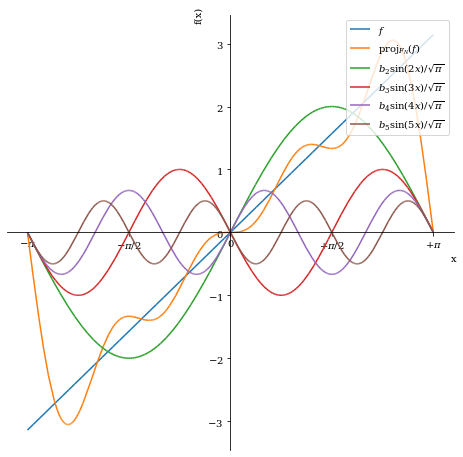

In [16]:
N = 4
proj = Sum((bk*sn),(k,1,N))
parts = [(bk*sn).subs(k,j) for j in range(1,N+1)]
p = plot(x,proj,*parts,d,show=False)
for idx,line in enumerate(p[2:]):
    j = idx + 2
    line.line_color = 'C'+str(j)
    line.label      = r'$b_{}\sin({}x)/\sqrt{{\pi}}$'.format(j,j)
p[0].label = r'$f$'
p[1].label = r'$\mathrm{proj}_{F_N}(f)$'
p[1].line_color = 'C1'
p.legend = true

import numpy as np
import matplotlib.pyplot as plt
p.save('');
p._backend.fig.set_size_inches(8,8)
p._backend.ax[0].set_xticks(np.linspace(-np.pi,+np.pi,5))
p._backend.ax[0].set_xticklabels([r'$-\pi$',r'$-\pi/2$','0',r'$+\pi/2$',r'$+\pi$']);

We see that the projection $\mathrm{proj}_{F_N}(f)$ approaches $f$ on the interval, and from the approximation theorem, we know that this approximation is the one that come closest to $f$ on the subspace spanned by $F_N$.  Clearly, we can approximate $f(x)=x$ even closer by picking a large $N$.

From regular algebra, we know that we can write 

$$e^{ikx} = \cos(kx) + i\sin(kx)\quad,$$

with $i=\sqrt{-1}$ is the imaginary unit.  We can therefor define another set of orthonormal functions by 

$$E_N = \left\{\frac{1}{\sqrt{2\pi}}e^{ikx}\,\middle|\, k=-N,\ldots,N,\ x\in[-\pi,\pi]\right\}\quad,$$ 

on which we can project $f\in\mathbb{C}([-\pi,\pi])$.  We must verify that these functions are indeed orthogonal and of unit length. 

In [17]:
ikl = Integral(1/sqrt(2*pi)*exp(I*k*x).conjugate()*1/sqrt(2*pi)*exp(I*l*x),d)
ikl

π                   
⌠                   
⎮   -ⅈ⋅k⋅x  ⅈ⋅l⋅x   
⎮  ℯ      ⋅ℯ        
⎮  ────────────── dx
⎮       2⋅π         
⌡                   
-π                  

Note, since $f_k(x) = e^{ikx}$ is a complex valued function, we must take the complex conjugate when calculating the inner product 

$$\langle f_k, f_l\rangle = \int_{-\pi}^{+\pi}\mathrm{d}x\,(e^{ikx})^\dagger e^{ilx} = 
\int_{-\pi}^{+\pi}\mathrm{d}x\,e^{-ikx}e^{ilk} = \int_{-\pi}^{+\pi}\mathrm{d}x\,e^{i(l-k)x}\quad.$$

First, for $k,l>0$, we find 

In [18]:
k, l = symbols('k l',positive=True,integer=True)
ikl.doit().simplify()

⎧1  for k = l
⎨            
⎩0  otherwise

or the Kronecker $\delta$.

In [19]:
KroneckerDelta(k,l)

δ   
 k,l

For the case of $k=0$ and $l>0$, and vice versa, we find 

In [20]:
simplify((ikl.subs(k,0).doit(),ikl.subs(l,0).doit()))


⎛     ⅈ⋅π⋅l      -ⅈ⋅π⋅l       ⅈ⋅π⋅k      -ⅈ⋅π⋅k⎞
⎜  ⅈ⋅ℯ        ⅈ⋅ℯ          ⅈ⋅ℯ        ⅈ⋅ℯ      ⎟
⎜- ──────── + ─────────, - ──────── + ─────────⎟
⎝   2⋅π⋅l       2⋅π⋅l       2⋅π⋅k       2⋅π⋅k  ⎠

and finally, we should check for negative $k,l$, but realising that $(e^{ikx})^\dagger=e^{-ikx}$, we can make do with testing $k>0$ and $l<0$

In [21]:
nl = symbols('l',negative=True,integer=True)
ikl.subs(l,nl).doit().simplify()

0

and thus, we have that $E_N$ is an orthonormal set of functions spanning a subspace of $\mathbb{C}([-\pi,+\pi])$. 

Let us again consider the function $f(x)=x$ and project that onto $E_N$.  Again, we need to calculate the (possibly complex) coefficients by taking the inner product of $f$ with the elements of $E_N$. 

In [22]:
k = symbols('k',integer=True)
ik = Integral(x*1/sqrt(2*pi)*exp(-I*k*x),d)
ik

π                 
⌠                 
⎮        -ⅈ⋅k⋅x   
⎮  √2⋅x⋅ℯ         
⎮  ──────────── dx
⎮      2⋅√π       
⌡                 
-π                

and we find

In [23]:
ik.doit().simplify()

⎧    k + 1/2                 
⎪(-1)       ⋅√2⋅√π           
⎪─────────────────  for k ≠ 0
⎨        k                   
⎪                            
⎪        0          otherwise
⎩                            

Again, let us plot the function, the projection, and the parts of the projection. Note, we take the real value of the projection and parts.  This, we can do because the imaginary parts are very small.  

In [24]:
N = 4
fk = ik.doit().simplify()*exp(I*k*x)
proj = Sum(fk,(k,-N,N)).doit()
parts = [re((fk).subs(k,j)) for j in range(-N,N+1)]

iv = [complex(proj.evalf(subs={x:xx})).imag for xx in np.linspace(-np.pi,np.pi,100)]
print('Largest imaginary part {}'.format(max(iv)))

Largest imaginary part 1.0587911840678754e-22


We do the plot of the function $f$, the projection $\mathrm{proj}_{E_N}(f)$, and the components of the projection $c_k e^{ikx}$ for $k=-4,\ldots,4$. 

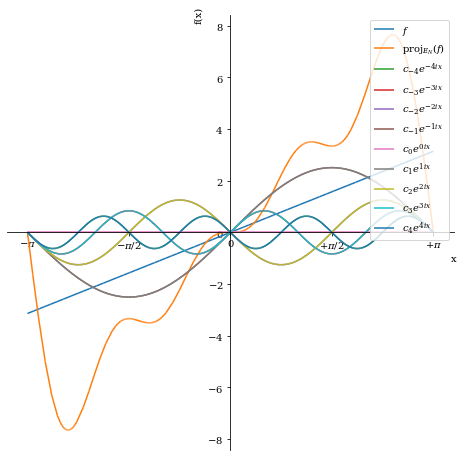

In [25]:
p = plot(x,re(proj),*parts,d,show=False)
for idx,(n,line) in enumerate(zip(range(-N,N+1),p[2:])):
    j = idx + 2
    line.line_color = 'C'+str(j)
    line.label      = r'$c_{{{}}}e^{{{}ix}}$'.format(n,n)
p[0].label = r'$f$'
p[1].label = r'$\mathrm{proj}_{E_N}(f)$'
p[1].line_color = 'C1'
p.legend = true
p.save('');
p._backend.fig.set_size_inches(8,8)
p._backend.ax[0].set_xticks(np.linspace(-np.pi,+np.pi,5))
p._backend.ax[0].set_xticklabels([r'$-\pi$',r'$-\pi/2$','0',r'$+\pi/2$',r'$+\pi$']);

## Exercises

### Phase shift 

Show that we can shift the arguments of $\cos(kx)$ and $\sin(lx)$ by arbitrary phases $\phi,\psi$ and still have an orthogonal set as long as we require that $\phi=\psi$ for $k=l$. 

In [26]:
k, l = symbols('k l', integer=True,negative=False)
phi,psi = symbols('phi psi',real=True)
integrate(cos(k*x+phi)*sin(l*x+psi),d).simplify()

⎧2⋅π⋅sin(ψ)⋅cos(φ)       for k = 0 ∧ l = 0      
⎪                                               
⎪  π⋅sin(φ + ψ)     for (k = 0 ∧ l = 0) ∨ k = -l
⎨                                               
⎪  -π⋅sin(φ - ψ)    for (k = 0 ∧ l = 0) ∨ k = l 
⎪                                               
⎩        0                   otherwise          

# Other orthogonal functions

In the previous section, we saw that the two sets 

\begin{align*}
  F_N &= \left\{ 
     \frac{1}{\sqrt{2\pi}},
     \frac{\cos(kx)}{\sqrt{\pi}},
     \frac{\sin(kx)}{\sqrt{\pi}}\,\middle|\,
     k=1,\ldots,N,\ x\in[-\pi,+\pi]\right\}\\
  E_N &= \left\{\frac{1}{\sqrt{2\pi}}e^{ikx}\,\middle|\, k=-N,\ldots,N,\ x\in[-\pi,+\pi]\right\}
\end{align*} 

both are orthonormal sets on $[-\pi,\pi]$, and we saw how $E_N$ forms the basis for Fourier analysis of arbitrary continuous functions defined on that interval. 

These two sets are not the only interesting orthonormal sets of functions - in fact, there are many such sets applicable for various kinds of analysis.  In this section, we will take a look at some of those sets.  Note, we will look at _orthogonal_ sets of functions, but as we've seen we can trivially turn these sets into _orhtonormal_ sets by proper normalisation. 

## Legendre polynomials 

The set of functions 

$$P_N^{\text{Legendre}} = \left\{\frac{1}{2^nn!}\frac{\mathrm{d}^n}{\mathrm{d}x^n}(x^2-1)^n
\,\middle|\,n=1,\ldots N,x\in[-1,1]\right\}\quad,$$ 

form an orthonormal set.  Let us calculate the first 5 ($n=0,\ldots,4$)

In [27]:
n = symbols('n',integer=True,negative=False)
x = symbols('x',real=True)
PLegendreN = 1/(2**n*factorial(n))*Derivative((x**2-1)**n,(x,n),evaluate=False)
[PLegendreN.subs(n,nn).doit() for nn in range(5)]

⎡                                                                2⎤
⎢         2        ⎛   2    ⎞     4       2 ⎛ 2    ⎞     ⎛ 2    ⎞ ⎥
⎢      3⋅x  - 1  x⋅⎝5⋅x  - 3⎠  8⋅x  + 24⋅x ⋅⎝x  - 1⎠ + 3⋅⎝x  - 1⎠ ⎥
⎢1, x, ────────, ────────────, ───────────────────────────────────⎥
⎣         2           2                         8                 ⎦

These polynomials are solutions to the Legendre differential equation 

$$(1-x^2)\frac{\mathrm{d}^2y}{\mathrm{d}x^2} - 2x\frac{\mathrm{d}y}{\mathrm{d}x} + n(n+1)y = 0\quad,$$ 

and which is relevant to solving the the [Laplace equation](https://en.wikipedia.org/wiki/Legendre_polynomials#Applications_of_Legendre_polynomials) 

$$\nabla^2\Phi(x) = 0\quad,$$ 

and thus have numerous applications in physics. 

## Hermite polynomials 

The set of polynomials defined by 

$$P^{\text{Hermite}}_N = \left\{(-1)^n e^{x^2}\frac{\mathrm{d}^n}{\mathrm{d}x^n}e^{-x^2}\,\middle|\,
  n=0,\ldots,N,\ x\in\mathbb{R}\right\}\quad,$$
  
are solutions to the differential equation 

$$\frac{\mathrm{d}^2y}{\mathrm{d}x^2} - 2x\frac{\mathrm{d}y}{\mathrm{d}x} + 2ny = 0\quad,$$ 

and form an orthogonal set on the subset of continuous functions, over the whole set of real numbers, $f\in\mathbb{C}(\mathbb{R})$ for which 

$$\int_{-\infty}^{\infty}\mathrm{d}x\,f^2(x)e^{-x^2}\quad,$$ 

converges, and we define the inner product as 

$$\langle f,g\rangle = \int_{-\infty}^{\infty}\mathrm{d}x\,f(x)g(x)e^{-x^2}\quad.$$

Let us calculate the five first polynomials 

In [28]:
PHermiteN = (-1)**n*exp(x**2)*Derivative(exp(-x**2),(x,n))
[PHermiteN.subs(n,nn).doit().expand() for nn in range(6)]

⎡           2         3             4       2           5        3        ⎤
⎣1, 2⋅x, 4⋅x  - 2, 8⋅x  - 12⋅x, 16⋅x  - 48⋅x  + 12, 32⋅x  - 160⋅x  + 120⋅x⎦

The differential equation above is related to the Schrödinger's equation for a [harmonic oscillator](https://en.wikipedia.org/wiki/Quantum_harmonic_oscillator), and the Hermite polynomials thus provides the eigenfunctions (-vectors) of such a system. 

### Recursive representation of Hermite polynomials 

The Hermite polynomials 

$$H_n(x) = (-1)^n e^{x^2}\frac{\mathrm{d}^n}{\mathrm{d}x^n}e^{-x^2}\quad,$$ 

can be written in a recursive form as 

\begin{align*}
 H_0(x) &= 1\\
 H_1(x) &= 2x\\
 H_{n+1}(x) &= 2xH_n(x)-2nH_{n-1}(x)
\end{align*}

First, we calculate $H_0$ and $H_1$

In [29]:
[PHermiteN.subs(n,nn).doit().simplify() for nn in range(2)]

[1, 2⋅x]

Next, we differentiate the expression for $n=k$.  Note, to stop _SymPy_ from fully evaluating the derivatives, we wrap the $n$-derivative in an `UnevaluatedExpr`. 

In [30]:
H = Function('H')
PH = (-1)**n * exp(x**2)*UnevaluatedExpr(Derivative(exp(-x**2),(x,n)))
PH

       ⎛ 2⎞   n⎛   2⎞
    n  ⎝x ⎠  d ⎜ -x ⎟
(-1) ⋅ℯ    ⋅───⎝ℯ   ⎠
              n      
            dx       

In [31]:
dHn = PH.diff(x)
Eq(Derivative(H(n,x),x),dHn)

                         ⎛ 2⎞   n⎛   2⎞          ⎛ 2⎞   ⎛  n⎛   2⎞⎞
d                   n    ⎝x ⎠  d ⎜ -x ⎟       n  ⎝x ⎠ d ⎜ d ⎜ -x ⎟⎟
──(H(n, x)) = 2⋅(-1) ⋅x⋅ℯ    ⋅───⎝ℯ   ⎠ + (-1) ⋅ℯ    ⋅──⎜───⎝ℯ   ⎠⎟
dx                              n                     dx⎜  n      ⎟
                              dx                        ⎝dx       ⎠

Here, we recognise the first term as $2xH_n(x)$, while the second term can be rewritten.  Note, again, we introduce an `UnevaluatedExpr` - this time around the $n+1$ derivative 

In [32]:
dEn   = Derivative(exp(-x**2),(x,n))
dEnp1 = Derivative(exp(-x**2),(x,n+1))
dHnn  = dHn.subs(PH,H(n,x))\
          .subs(Derivative(UnevaluatedExpr(dEn),x),
                UnevaluatedExpr(dEnp1))
Eq(Derivative(H(n,x),x),dHnn)

                     ⎛ 2⎞   n + 1⎛   2⎞              
d                 n  ⎝x ⎠  d     ⎜ -x ⎟              
──(H(n, x)) = (-1) ⋅ℯ    ⋅───────⎝ℯ   ⎠ + 2⋅x⋅H(n, x)
dx                          n + 1                    
                          dx                         

Now, the first term is clearly $-H_{n+1}(x)$

In [33]:
PH1 = (PH.subs(n,n+1)*-1).simplify()\
    .subs(dEnp1,UnevaluatedExpr(dEnp1))
Eq(-H(n+1,x),PH1)

                      ⎛ 2⎞   n + 1⎛   2⎞
                   n  ⎝x ⎠  d     ⎜ -x ⎟
-H(n + 1, x) = (-1) ⋅ℯ    ⋅───────⎝ℯ   ⎠
                             n + 1      
                           dx           

which we then substitute in 

In [34]:
dHnnn = dHnn.subs(PH1,-H(n+1,x))
Eq(Derivative(H(n,x),x),dHnnn)

d                                      
──(H(n, x)) = 2⋅x⋅H(n, x) - H(n + 1, x)
dx                                     

Thus, we have 

In [35]:
Eq(-dHnnn.args[0],dHnnn.args[1]-Derivative(H(n,x),x))

                            d          
H(n + 1, x) = 2⋅x⋅H(n, x) - ──(H(n, x))
                            dx         

Thus, we need to show that $\frac{d}{dx}H_n(x) = 2n H_{n-1}(x)$.  Keeping in mind that $n\gt1$, We start from `dHn` defined above

In [36]:
Eq(Derivative(H(n,x),x),dHn)

                         ⎛ 2⎞   n⎛   2⎞          ⎛ 2⎞   ⎛  n⎛   2⎞⎞
d                   n    ⎝x ⎠  d ⎜ -x ⎟       n  ⎝x ⎠ d ⎜ d ⎜ -x ⎟⎟
──(H(n, x)) = 2⋅(-1) ⋅x⋅ℯ    ⋅───⎝ℯ   ⎠ + (-1) ⋅ℯ    ⋅──⎜───⎝ℯ   ⎠⎟
dx                              n                     dx⎜  n      ⎟
                              dx                        ⎝dx       ⎠

In the second term, we reverse the order of differentiation i.e., 

$$\frac{d}{dx}\frac{d^n}{dx^n} = \frac{d^n}{dx^n}\frac{d}{dx}\quad.$$

In [37]:
dHnn = dHn.subs(Derivative(UnevaluatedExpr(dEn),x),
                exp(-x**2).diff(x).diff((x,n)))
Eq(Derivative(H(n,x),x),dHnn)

                                                           n           n      
                                                      ___________ ___________ 
                                                      ╲           ╲           
                                                       ╲           ╲          
                                                        ╲           ╲         
                                                         ╲           ╲        
                                                          ╲           ╲       
                                                           ╲           ╲      
                                                            ╲           ╲     
                                                             ╲           ╲    
                         ⎛ 2⎞   n⎛   2⎞          ⎛ 2⎞         ╲           ╲   
d                   n    ⎝x ⎠  d ⎜ -x ⎟       n  ⎝x ⎠          ╲           ╲  
──(H(n, x)) = 2⋅(-1) ⋅x⋅ℯ    ⋅───⎝ℯ   ⎠ + (-1) ⋅ℯ   

This looks tricky, but we notice that the sum is really only over two elements $k_2=0$ and $k_2=1$.  The result above comes from applying the general Leibniz rule that states for two functions $f,g$ which are $n$ time differential, we have 

$$\frac{d^n}{dx^n}(fg)(x) = \sum_{k=0}^{n}\begin{pmatrix} n\\k\end{pmatrix}\frac{d^k}{dx^k}f(x)\frac{d^{n-k}}{dx^{n-k}}g(x)\quad.$$

So let us look at little closer at these two cases.  We do this by extracting the relevant sub-expression of the _SymPy_ expression `dHnn` defined above.  

In [38]:
case0 = dHnn.args[0].args[1].args[0].args[0].args[0]
case0

         Max(0, -_k1 - _k2 + n) ⎛   2⎞ 
        d                       ⎜ -x ⎟ 
-2⋅x⋅n!⋅────────────────────────⎝ℯ   ⎠ 
          Max(0, -_k1 - _k2 + n)       
        dx                             
───────────────────────────────────────
        k₁!⋅k₂!⋅(-k₁ - k₂ + n)!        

Since we have $n>1$, we can substitute $k_1,k_2=0$ into this expression, to find the first term of the above sum.  We find 

In [39]:
k1,k2 = [k for k in list(case0.free_symbols) if k.name.startswith('k')]

In [40]:
case0 = case0.subs({k1:0,k2:0})
case0 

       n⎛   2⎞
      d ⎜ -x ⎟
-2⋅x⋅───⎝ℯ   ⎠
       n      
     dx       

Similarly, we evaluate the second term of the above sum by setting $k_1=0$ and $k_2=1$ (and simplify) in the second case. 

In [41]:
n,*_     = [n for n in list(case0.free_symbols) if n.name.startswith('n')]
case1 =  dHnn.args[0].args[1].args[0].args[1].args[0]
case1 = case1.subs({k1:0,k2:1})#.subs(n,n+1).subs(n,n-1)
case1

        Max(0, n - 1)⎛   2⎞ 
       d             ⎜ -x ⎟ 
-2⋅n!⋅───────────────⎝ℯ   ⎠ 
        Max(0, n - 1)       
      dx                    
────────────────────────────
          (n - 1)!          

The remainder of the terms in the sum are all zero (which stems from the fact that $\frac{d^k(-2x)}{dx^k}=0$ for all $k>1$).  Thus, we have that 

In [42]:
dHnnn = \
    dHnn.args[1]+dHnn.args[0].args[0]*dHnn.args[0].args[2]*\
    (case0+case1)
Eq(Derivative(H(x,n),x),dHnnn)

                                                ⎛                         Max(
                                                ⎜                        d    
                                                ⎜                  2⋅n!⋅──────
                         ⎛ 2⎞   n⎛   2⎞         ⎜        n⎛   2⎞          Max(
d                   n    ⎝x ⎠  d ⎜ -x ⎟       n ⎜       d ⎜ -x ⎟        dx    
──(H(x, n)) = 2⋅(-1) ⋅x⋅ℯ    ⋅───⎝ℯ   ⎠ + (-1) ⋅⎜- 2⋅x⋅───⎝ℯ   ⎠ - ───────────
dx                              n               ⎜        n                  (n
                              dx                ⎝      dx                     

0, n - 1)⎛   2⎞⎞      
         ⎜ -x ⎟⎟      
─────────⎝ℯ   ⎠⎟      
0, n - 1)      ⎟  ⎛ 2⎞
               ⎟  ⎝x ⎠
───────────────⎟⋅ℯ    
 - 1)!         ⎟      
               ⎠      

To simplify this further, we have to remove the `UnevaluatedExpr` we used above.  We do that by simple substitution and then simplify to get 

In [43]:
dHnnnn = dHnnn.subs(UnevaluatedExpr(dEn),dEn).subs(n,n+1).subs(n,n-1)
Eq(Derivative(H(n,x),x),dHnnnn)

                                                ⎛                         n - 
                                                ⎜                        d    
                                                ⎜                  2⋅n!⋅──────
                         ⎛ 2⎞   n⎛   2⎞         ⎜        n⎛   2⎞          n - 
d                   n    ⎝x ⎠  d ⎜ -x ⎟       n ⎜       d ⎜ -x ⎟        dx    
──(H(n, x)) = 2⋅(-1) ⋅x⋅ℯ    ⋅───⎝ℯ   ⎠ + (-1) ⋅⎜- 2⋅x⋅───⎝ℯ   ⎠ - ───────────
dx                              n               ⎜        n              (n - 1
                              dx                ⎝      dx                     

1⎛   2⎞⎞      
 ⎜ -x ⎟⎟      
─⎝ℯ   ⎠⎟      
1      ⎟  ⎛ 2⎞
       ⎟  ⎝x ⎠
───────⎟⋅ℯ    
)!     ⎟      
       ⎠      

and we recognise $H_{n-1}(x)$ in this expression.  To see this, we divide by $2n$ and rewrite $(-1)^n$ as $(-1)(-1)^{n-1}$ (remember, $n>1$), and factorise. 

and substitute our expression for $H_{n-1}(x)$.

In [44]:
dEnm1 = Derivative(exp(-x**2),(x,n-1))
tmp = (dHnnnn/(2*n))\
    .subs((-1)**n,-1*(-1)**(n-1))\
    .factor()
tmp = tmp.subs(dEnm1,UnevaluatedExpr(dEnm1))\
    .simplify()\
    .subs((-1)**(1-n),(-1)**(n-1))\
    .subs(UnevaluatedExpr(dEnm1),dEnm1) 
    
Eq(Eq(Eq(Derivative(H(n,x),x)/(2*n),tmp,evaluate=False),
      PHermiteN.subs(n,n-1),evaluate=False),
   H(n-1,x),evaluate=False)

d                                                                             
──(H(n, x))              ⎛ 2⎞   n - 1⎛   2⎞              ⎛ 2⎞   n - 1⎛   2⎞   
dx                n - 1  ⎝x ⎠  d     ⎜ -x ⎟       n - 1  ⎝x ⎠  d     ⎜ -x ⎟   
─────────── = (-1)     ⋅ℯ    ⋅───────⎝ℯ   ⎠ = (-1)     ⋅ℯ    ⋅───────⎝ℯ   ⎠ = 
    2⋅n                         n - 1                           n - 1         
                              dx                              dx              

           
           
           
H(n - 1, x)
           
           

Inserting this above, we find that 

In [45]:
Eq(H(n+1,x),2*x*H(n,x)-2*n*H(n-1,x))

H(n + 1, x) = -2⋅n⋅H(n - 1, x) + 2⋅x⋅H(n, x)

as we set out to show. 

## Chebyshev polynomials

(Note, you may see many different spellings of the name Chebyshev and hear equally many if not more different pronunciations - [Wikimedia](https://commons.wikimedia.org/wiki/File:Ru-Pafnuty_Lvovich_Chebyshev.ogg) has a sound file of the pronunciation.)


The set of functions 

$$P^{Chebyshev}_N = \left\{\cos(n\cos^{-1}x)\,\middle|\,n=0,\ldots,N,\ x\in[-1,1]\right\}\quad,$$ 

is orthogonal in a subspace of continuous functions over $[-1,1]$ with the inner product given by 

$$\langle f,g\rangle = \int_{-1}^{1}\mathrm{d}x\,f(x)g(x)\frac{1}{\sqrt{1-x^2}}\quad.$$ 

In [46]:
PChebyshevN = cos(n*acos(x))
TNs = [PChebyshevN.subs(n,nn).simplify() for nn in range(6)]
TNs

[1, x, cos(2⋅acos(x)), cos(3⋅acos(x)), cos(4⋅acos(x)), cos(5⋅acos(x))]

We plot these functions over the domain $[-1,1]$. 

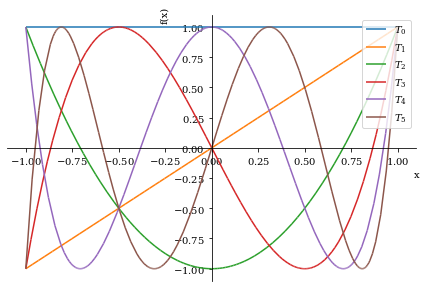

In [47]:
p = plot(*TNs,(x,-1,1),show=False)
for i, pp in enumerate(p):
    pp.line_color = 'C'+str(i)
    pp.label      = r'$T_{}$'.format(i)
p.legend = True
p.show()

Chebyshev polynomials, often labeled $T_n$ are useful in numerical analysis since they allow linear approximation of nearly any continuous function. 

## Exercises

### Chebyshev 

Show that the Chebyshev polynomials 

$$ T_n(x) = \cos(n\cos^{-1}x)\quad,$$ 

are orthogonal with respect to the inner product 

$$\langle f,g\rangle = \int_{-1}^{1}\mathrm{d}x\, f(x)g(x)\frac{1}{\sqrt{1-x^2}}\quad.$$

In [48]:
Integral(PChebyshevN.subs(n,k)*PChebyshevN.subs(n,l)/sqrt(1-x**2),
         (x,-1,1)).doit().simplify()

⎧π           for k = 0 ∧ l = 0          
⎪                                       
⎪π                                      
⎨─  for (k = 0 ∧ l = 0) ∨ k = -l ∨ k = l
⎪2                                      
⎪                                       
⎩0               otherwise              